C:\Users\rxiau6-PC\.conda\envs\gis\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<AxesSubplot:>

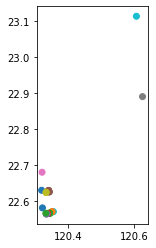

In [34]:
import auth
import geopandas as gpd
import pandas as pd
import requests as rq
import json
from shapely.geometry import Point
app_id = 'c83d5010232d487b99892d4cf55818e6'
app_key = 'DT6ISkaiGUpYaktvv4WFo5gRU1A'
a = auth.Auth(app_id, app_key)

headers= a.get_auth_header()
url = "https://ptx.transportdata.tw/MOTC/v2/Bus/Stop/City/Kaohsiung?%24top=30&%24format=JSON"
req = rq.get(url, headers=headers)

data = json.loads(req.text)
# print (data)
n1="StopPosition.PositionLon"
n2="StopPosition.PositionLat"
df = pd.json_normalize(data)
geom = [Point(xy) for xy in zip(df[n1],df[n2])]
crs = {'init': 'epsg:4326'}
gdf = gpd.GeoDataFrame(df, crs=crs, geometry=geom)
gdf[gdf['City']=='Kaohsiung'].plot(column='StopName.Zh_tw')


C:\Users\rxiau6-PC\.conda\envs\gis\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<AxesSubplot:>

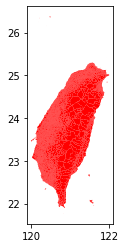

In [33]:
import geopandas as gpd

gdf = gpd.read_file('E:\CODING\python\gis\VILLAGE_MOI_121_1101214.shx',encoding='utf8')
gdf.crs = {'init' : 'epsg:3826'}
gdf =  gdf.to_crs(epsg=4326)
gdf.plot(color='red')
